## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 1.0.4
Usando seaborn 0.9.0
Usando scipy 1.4.1
Usando yellowbrick 0.9
Usando numpy 1.18.5


c:\users\edugs\pycharmprojects\main_project\venv\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [3]:
# solução
colunas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1",
           "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]

enem = pd.read_csv("input/MICRODADOS_ENEM_2017.csv", sep=';', encoding='iso-8859-1', usecols=colunas)


In [4]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [5]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

6731341 elementos e 9 colunas


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

In [6]:
# solução
todas_as_notas = enem.columns
todas_as_notas

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5'],
      dtype='object')

## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [7]:
# solução
enem = enem.dropna(axis=0)
enem[["NU_NOTA_MT"]].head()

,NU_NOTA_MT
0,465.500
3,591.200
4,584.600
5,578.500
6,607.500


## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [8]:
# solução e impressão
enem["nota_total"] = pd.DataFrame(enem[todas_as_notas].sum(axis=1))
enem[["nota_total"]].head()

,nota_total
0,2681.400
3,2949.500
4,2786.700
5,2795.000
6,2858.500


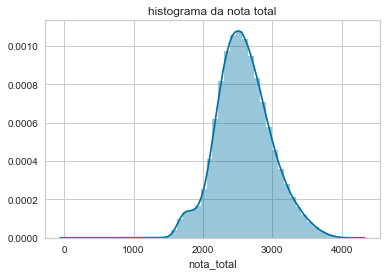

a media das notas totais é 2592.747
o desvio padrao das notas totais é entre 1800.767 e 3384.726
a mediana das notas totais é 2569.3


In [9]:
# solução histograma e descrição
import matplotlib.pyplot as plt

def dados_estatisticos_nota_total(enem, title="histograma da nota total"):
    sns.distplot(enem["nota_total"]).set_title(title)
    plt.show()
    media = enem['nota_total'].mean()
    desvio = enem['nota_total'].std()
    desvio_padrao = (media - 2 * desvio, media + 2 * desvio)
    mediana = enem['nota_total'].median()
    print(f"a media das notas totais é {round(media, 3)}")
    print(f"o desvio padrao das notas totais é entre {round(desvio_padrao[0], 3)} e {round(desvio_padrao[1], 3)}")
    print(f"a mediana das notas totais é {mediana}")
    
dados_estatisticos_nota_total(enem)

## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

Enem EDA sampling tem a distribuição


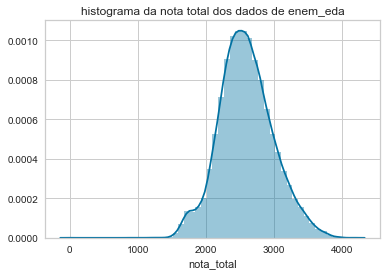

a media das notas totais é 2594.186
o desvio padrao das notas totais é entre 1801.221 e 3387.152
a mediana das notas totais é 2572.8


In [10]:
# solução sua função de sampling

def eda_sample(enem):
    SEED = 745
    np.random.seed(SEED)
    enem_eda = enem.sample(frac =0.01)
    print("Enem EDA sampling tem a distribuição")
    dados_estatisticos_nota_total(enem_eda, title="histograma da nota total dos dados de enem_eda")
    return enem_eda

enem_eda = eda_sample(enem)

analisando o histrograma do sample e do conjunto inteiro, pode se preceber que
no sample e no conjunto inteiro :

- a distribuicao dos dados ficam entre 2000 e 3000
- a media é extremamente parecida
- a mediana é extremamente parecida
- o desvio padrao é extremamente parecido

ou seja, o `enem_eda` representa o conjunto inteiro


## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

In [11]:
# solução
todas_as_notas = enem.columns
correlacoes = enem.corr()

In [12]:
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")

In [13]:
correlacoes

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
NU_NOTA_CN,1.000,0.612,0.570,0.549,0.345,0.319,0.390,0.384,0.356,0.733
NU_NOTA_CH,0.612,1.000,0.708,0.570,0.398,0.359,0.436,0.427,0.394,0.794
NU_NOTA_LC,0.570,0.708,1.000,0.542,0.441,0.370,0.455,0.446,0.396,0.776
NU_NOTA_MT,0.549,0.570,0.542,1.000,0.357,0.325,0.394,0.391,0.353,0.760
NU_NOTA_COMP1,0.345,0.398,0.441,0.357,1.000,0.774,0.833,0.862,0.594,0.726
NU_NOTA_COMP2,0.319,0.359,0.370,0.325,0.774,1.000,0.859,0.796,0.631,0.693
NU_NOTA_COMP3,0.390,0.436,0.455,0.394,0.833,0.859,1.000,0.867,0.673,0.773
NU_NOTA_COMP4,0.384,0.427,0.446,0.391,0.862,0.796,0.867,1.000,0.653,0.761
NU_NOTA_COMP5,0.356,0.394,0.396,0.353,0.594,0.631,0.673,0.653,1.000,0.677
nota_total,0.733,0.794,0.776,0.760,0.726,0.693,0.773,0.761,0.677,1.000


## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

In [14]:
# solução: cálculo da tabela de correlação com todas as notas
sns.set(style="white")
correlacao_com_nota_total = correlacoes.loc[["nota_total"]]

Text(0.5,1,'correlacao das notas com a nota total')

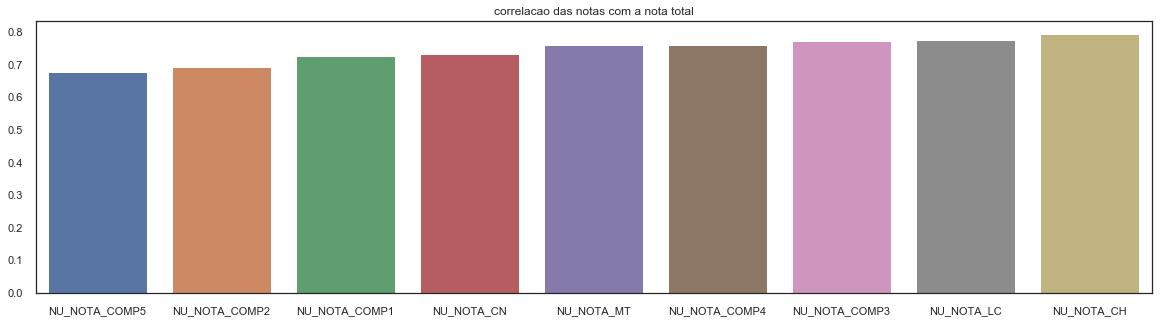

In [15]:
# solução gráfico
sns.set(style="white")
plt.figure(figsize=(20, 5))
dados_ordenados = correlacao_com_nota_total.T.sort_values(by="nota_total").T.drop("nota_total", axis=1)
sns.barplot(x=dados_ordenados.columns, y=dados_ordenados.loc["nota_total"].values).set_title("correlacao das notas com a nota total")

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [16]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos
interesse = enem_eda[["NU_NOTA_MT", "NU_NOTA_LC", "nota_total"]]
interesse.head()

,NU_NOTA_MT,NU_NOTA_LC,nota_total
3066813,418.700,514.900,2471.600
249978,652.200,466.100,2807.900
2399891,532.700,539.900,2577.300
3959805,578.500,647.300,3198.700
5505273,374.900,419.900,2247.700


In [17]:
# Solução: a função de split

from sklearn.model_selection import train_test_split

def split(dados):
    SEED = 42367
    np.random.seed(SEED)
    x = dados.drop("nota_total", axis=1)
    y = dados["nota_total"]
    train_x, test_x, train_y, test_y = train_test_split(x, y)
    # train_test_split
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Desvio padrão do conjunto de testes", test_y.std())
    return train_x, test_x, train_y, test_y

In [18]:
# Código pronto

train_x, test_x, train_y, test_y = split(interesse)
if(train_x.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 396.6774613706174


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [20]:
# Solução: função para executar a regressão linear

def roda_regressao_linear(train_x, test_x, train_y, test_y):
    model = LinearRegression()
    model.fit(train_x, train_y)
    # calcule o r2_score com os dados de teste
    
    r2_score = model.score(test_x, test_y)
    # calcule a predição e os dois tipos de erros
    
    test_pred = model.predict(test_x)
    mse = mean_squared_error(test_y, test_pred)
    mae = mean_absolute_error(test_y, test_pred)
    
    print("*" * 80)
    print("r2 score", r2_score)
    print("mse", mse)
    print("mae", mae)
    
    return model

In [21]:
# código pronto

roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
r2 score 0.769231147198833
mse 36308.89210227679
mae 142.102755998379


LinearRegression()

## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

## Solução

    analisando se percebe que o erro médio absoluto, foi menor do que a perda, ou seja, em questao de erro nosso modelo esta bem

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

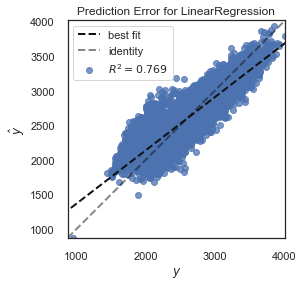

In [22]:
# código pronto

from yellowbrick.regressor import PredictionError

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

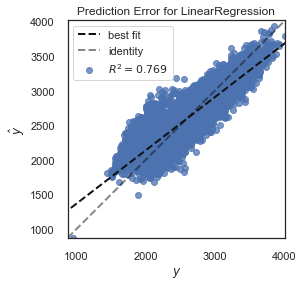

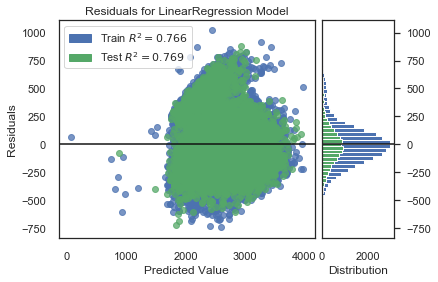

In [23]:
# código pronto

from yellowbrick.regressor import ResidualsPlot

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

In [24]:
# código pronto

def regressao_completa_para(notas):
    interesse = enem_eda[notas]
    train_x, test_x, train_y, test_y = split(interesse)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x,train_y,test_x,test_y)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 4) (33201,) (11067, 4) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_COMP1'] como X
Desvio padrão do conjunto de testes 396.6774613706174
********************************************************************************
r2 score 0.9134784779205858
mse 13613.191605250824
mae 92.29567925946658


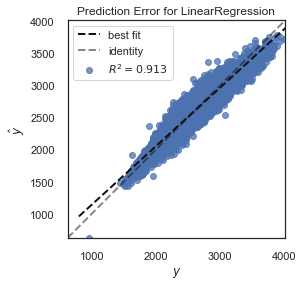

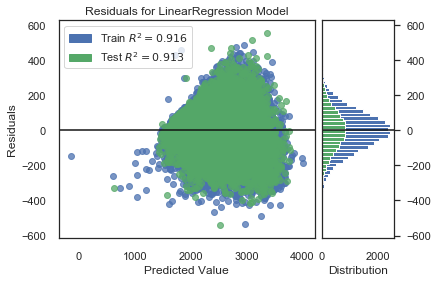

In [25]:
# solução 1: teste com todas as notas
# crie várias células com as combinações que julgar necessárias invocando sempre `regressao_completa_para`
# invoque ela com as notas que deseja analisar *E* a nota_total

regressao_completa_para(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', "NU_NOTA_COMP1",'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 396.6774613706174
********************************************************************************
r2 score 0.7803887662735014
mse 34553.365816199126
mae 138.6917029252791


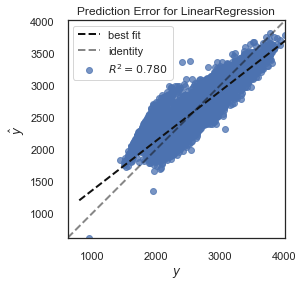

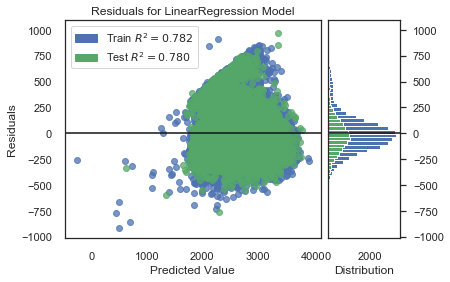

In [26]:
# solução 2: teste outra combinação

regressao_completa_para(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_COMP4' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.6774613706174
********************************************************************************
r2 score 0.8611647832919134
mse 21844.165026003215
mae 118.0736283060461


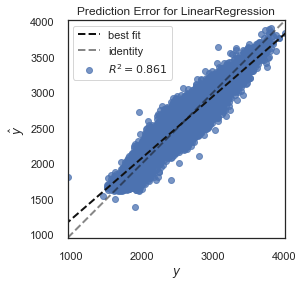

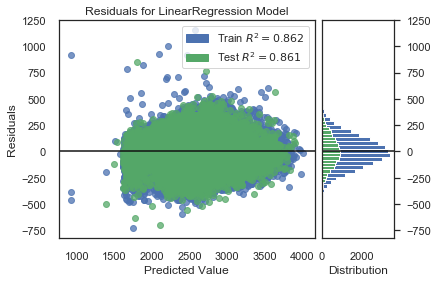

In [27]:
# solução 3: teste outra combinação

regressao_completa_para(['NU_NOTA_MT', 'NU_NOTA_COMP4','NU_NOTA_COMP3', 'nota_total'])


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 5) (33201,) (11067, 5) (11067,)
Usando colunas ['NU_NOTA_COMP1' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'
 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.6774613706174
********************************************************************************
r2 score 0.669947480117117
mse 51930.06416181119
mae 183.51132561008177


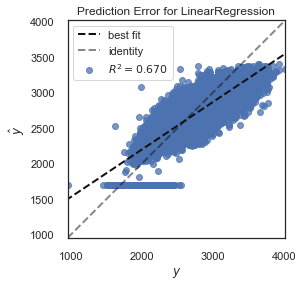

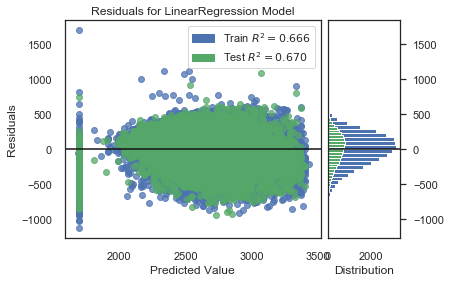

In [28]:
# solução 4: teste outra combinação
regressao_completa_para(['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', "nota_total"])


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 4) (33201,) (11067, 4) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6774613706174
********************************************************************************
r2 score 0.8475200762655193
mse 23991.00672138306
mae 109.06531946670809


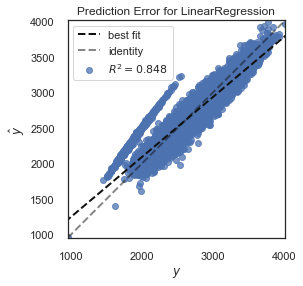

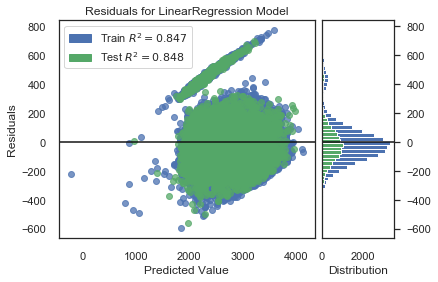

In [29]:
# solução 5: teste outra combinação

regressao_completa_para(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', "nota_total"])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 4) (33201,) (11067, 4) (11067,)
Usando colunas ['NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_LC' 'NU_NOTA_CH'] como X
Desvio padrão do conjunto de testes 396.6774613706174
********************************************************************************
r2 score 0.905065028592833
mse 14936.953543403537
mae 96.62660182951258


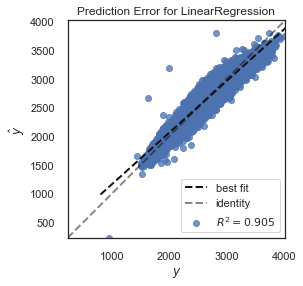

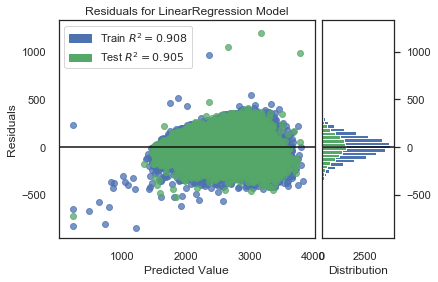

In [30]:
# solução 6: teste outra combinação
regressao_completa_para(['NU_NOTA_COMP3', 'NU_NOTA_COMP4',
                         "NU_NOTA_LC", "NU_NOTA_CH", "nota_total"])


Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'nota_total'],
      dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 6) (33201,) (11067, 6) (11067,)
Usando colunas ['NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_LC' 'NU_NOTA_CH' 'NU_NOTA_MT'
 'NU_NOTA_CN'] como X
Desvio padrão do conjunto de testes 396.6774613706174
********************************************************************************
r2 score 0.9867306214282973
mse 2087.787970412712
mae 36.74598180292371


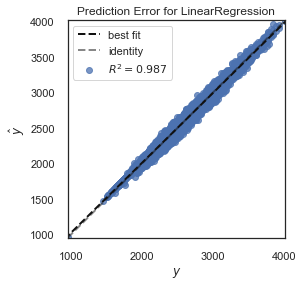

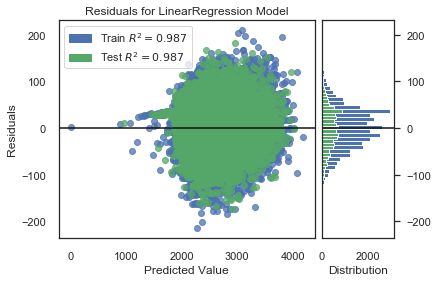

In [31]:
# solução 7: teste outra combinação
print(todas_as_notas)

regressao_completa_para(['NU_NOTA_COMP3', 'NU_NOTA_COMP4',
                         "NU_NOTA_LC", "NU_NOTA_CH", 'NU_NOTA_MT',
                         "nota_total", "NU_NOTA_CN"])



## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto coma de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6774613706174
********************************************************************************
r2 score 0.925075260832693
mse 11788.567812316252
mae 86.1874023306217


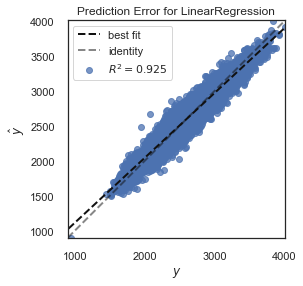

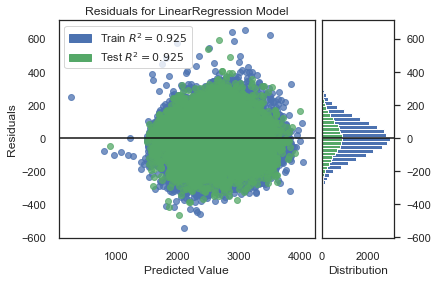

In [32]:
# solução
regressao_completa_para(['NU_NOTA_LC', "NU_NOTA_COMP3", 'NU_NOTA_MT', "nota_total"])


## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [33]:
# solução

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def gera_regressores():
    modelos = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(),
             RandomForestRegressor()]
    return modelos

In [34]:
# teste

if(len(gera_regressores()) != 5):
    print("Erro!!! São 5 regressores que queremos testar!")

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [35]:
# solução

def escolhe_dados(dados, colunas):
    dados_processados = dados[colunas]
    train_x, test_x, train_y, test_y = split(dados_processados)
    sns.distplot(train_y).set_title("histograma do train_y")
    plt.show()
    
    return train_x, test_x, train_y, test_y

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [36]:
# solução:

import time
def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    tic = time.time()
    modelo.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic

    previsao_x = modelo.predict(test_x)
    
    mse = mean_squared_error(test_y, previsao_x)
    mae = mean_absolute_error(test_y, previsao_x)
    print("Resultado", modelo, mse, mae)

    return mse, mae, tempo_de_treino

In [37]:
# código pronto

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

def analisa_regressao(dados):
    train_x, test_x, train_y, test_y = escolhe_dados(dados, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"])
    
    resultados = []
    for modelo in gera_regressores():
        
        # crie um pipeline chamado pipe usando StandardScaler() e o modelo
        # use o make_pipeline ou crie um Pipeline
        pipe = make_pipeline(StandardScaler(), modelo)
        pipe.fit(train_x, train_y)
        
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipe, train_x, test_x, train_y, test_y)
        
        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"])
    return test_x, test_y, resultados

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.6774613706174


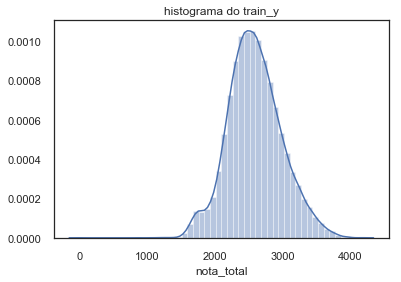

Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())]) 11788.567812316256 86.18740233062171
Resultado Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())]) 11786.673810163153 86.22345492148199
Resultado Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())]) 11788.547734550786 86.18754819236584
Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())]) 22839.678376931417 119.05571067136532
Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())]) 13100.438160350195 90.15520298363072


,modelo,mse,mae,tempo_de_treino
0,LinearRegression(),11788.568,86.187,0.006
1,Lasso(),11786.674,86.223,0.009
2,Ridge(),11788.548,86.188,0.005
3,DecisionTreeRegressor(),22839.678,119.056,0.094
4,"(DecisionTreeRegressor(max_features='auto', ra...",13100.438,90.155,5.820


In [38]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]


## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

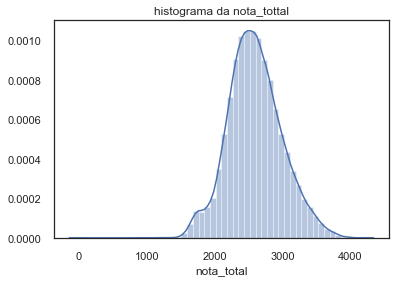

In [39]:
# solução: histograma
sns.distplot(enem_eda["nota_total"]).set_title("histograma da nota_tottal")
plt.show()

## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [40]:
# solução

def top_p(serie, p = 0.75):
    # calcule o quantil p
    quant = np.quantile(serie, p)
    print("quantile encontrado", quant)
    # defina y como sendo uma serie de 1s e 0s. 1 se o valor da serie for maior que o quantil, 0 se menor
    y = []
    
    for num in serie:
        if num > quant:
            y.append(1)
        else:
            y.append(0)
    y = pd.Series(y, index=serie.index)
    return y

In [41]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

quantile encontrado 7.75


In [42]:
# teste do top 10%

top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

quantile encontrado 9.1


## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [43]:
# código pronto

y_top25 = top_p(test_y)
y_top25.mean()

quantile encontrado 2837.8500000000004


0.2500225896810337

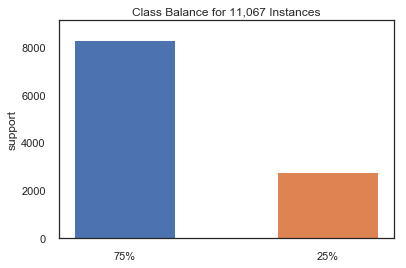

In [44]:
# código pronto

from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

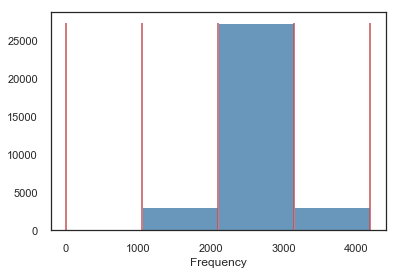

In [45]:
# código pronto

from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(train_y)
visualizer.poof()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [46]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [47]:
# solução

def gera_classificadores():
    # defina seus modelos
    modelos = [DummyClassifier(strategy='most_frequent'), LogisticRegression(), RidgeClassifier(),
             DecisionTreeClassifier(), RandomForestClassifier(n_estimators=10), SVC()]
    return modelos

In [48]:
# código pronto

if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [49]:
def split_classificacao(dados):
    # faça o seed do numpy
    SEED = 42367
    # defina X como todas as colunas de `dados` exceto top_p
    x = dados.drop("top_p", axis=1)
    # defina y como somente a coluna top_p
    y = dados["top_p"]
    # quebre em treino e teste, usando estratificação baseada em y
    train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y)

    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Média do conjunto de testes", test_y.mean())
    return train_x, test_x, train_y, test_y

## Testando sua função de split

In [50]:
# código pronto: teste

interesse = enem_eda[["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse['top_p'] = top_p(interesse['nota_total'])
interesse = interesse[["top_p", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


<ipython-input-50-332d11786505>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = top_p(interesse['nota_total'])


## Pergunta: implemente o treino e o teste do classificador

In [51]:
# solução:

import time
def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    pipe.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic
    accuracy_score = pipe.score(train_x, train_y)
    print("Resultado", nome, accuracy_score)

    return accuracy_score, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [52]:
# solução:

def escolhe_dados_para_classificacao(dados, colunas, p):
    interesse = dados[colunas]
    nota_total = dados["nota_total"]
    interesse['top_p'] = top_p(interesse["nota_total"], p=p)

    colunas.remove("nota_total")
    interesse = interesse[[*colunas, "top_p"]]
    
    train_x, test_x, train_y, test_y = split_classificacao(interesse)
    train_y.hist()
    plt.show()
    return train_x, test_x, train_y, test_y

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


<ipython-input-52-1f30bfdcd909>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = top_p(interesse["nota_total"], p=p)


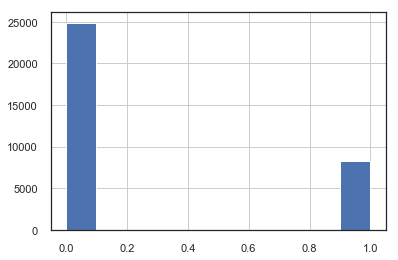

In [53]:
# testando a escolha

train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem_eda, ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=0.75)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

In [54]:
# código pronto

def analisa_classificacao(dados, p = 0.75):
    
    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        accuracy_score, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])
        
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    return test_x, test_y, resultados.set_index("tipo")


## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célular diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


<ipython-input-52-1f30bfdcd909>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = top_p(interesse["nota_total"], p=p)


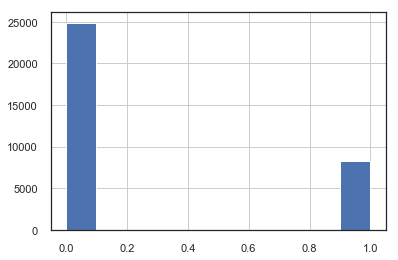

Resultado DummyClassifier 0.7500075298936779
Resultado LogisticRegression 0.9364175777838017
Resultado RidgeClassifier 0.9221107797957893
Resultado DecisionTreeClassifier 0.9999698804252884
Resultado RandomForestClassifier 0.9924399867473871
Resultado SVC 0.9360561428872625


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.005
LogisticRegression,0.936,0.031
RidgeClassifier,0.922,0.010
DecisionTreeClassifier,1.000,0.056
RandomForestClassifier,0.992,0.185
SVC,0.936,3.976


In [55]:
# solução top 25%
test_x, test_y, notas = analisa_classificacao(enem_eda)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2915.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.19996385651034607


<ipython-input-52-1f30bfdcd909>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = top_p(interesse["nota_total"], p=p)


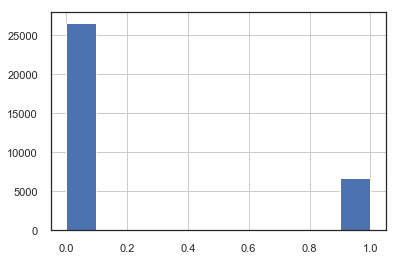

Resultado DummyClassifier 0.8000662630643656
Resultado LogisticRegression 0.9453028523237252
Resultado RidgeClassifier 0.927170868347339
Resultado DecisionTreeClassifier 0.9999698804252884
Resultado RandomForestClassifier 0.9946387157013343
Resultado SVC 0.945543808921418


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.800,0.005
LogisticRegression,0.945,0.032
RidgeClassifier,0.927,0.010
DecisionTreeClassifier,1.000,0.052
RandomForestClassifier,0.995,0.177
SVC,0.946,3.329


In [56]:
# solução top 20%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.80)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3119.0
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.10002710761724044


<ipython-input-52-1f30bfdcd909>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = top_p(interesse["nota_total"], p=p)


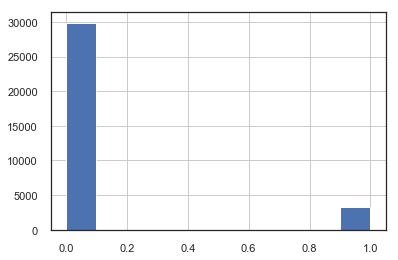

Resultado DummyClassifier 0.9000331315321828
Resultado LogisticRegression 0.9708141321044547
Resultado RidgeClassifier 0.9277130206921478
Resultado DecisionTreeClassifier 1.0
Resultado RandomForestClassifier 0.9966567272070118
Resultado SVC 0.971627360621668


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.900,0.004
LogisticRegression,0.971,0.034
RidgeClassifier,0.928,0.009
DecisionTreeClassifier,1.000,0.044
RandomForestClassifier,0.997,0.147
SVC,0.972,1.779


In [57]:
# solução top 10%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.90)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3290.7950000000005
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.04996837444655281


<ipython-input-52-1f30bfdcd909>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = top_p(interesse["nota_total"], p=p)


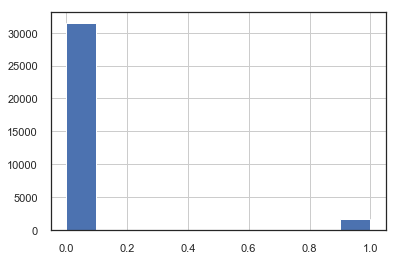

Resultado DummyClassifier 0.949971386404024
Resultado LogisticRegression 0.9822595704948646
Resultado RidgeClassifier 0.9500617451281588
Resultado DecisionTreeClassifier 1.0
Resultado RandomForestClassifier 0.9984337821149966
Resultado SVC 0.9819583747477486


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.950,0.005
LogisticRegression,0.982,0.035
RidgeClassifier,0.950,0.009
DecisionTreeClassifier,1.000,0.041
RandomForestClassifier,0.998,0.132
SVC,0.982,1.206


In [58]:
# solução top 5%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.95)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3588.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.01002981837896449


<ipython-input-52-1f30bfdcd909>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = top_p(interesse["nota_total"], p=p)


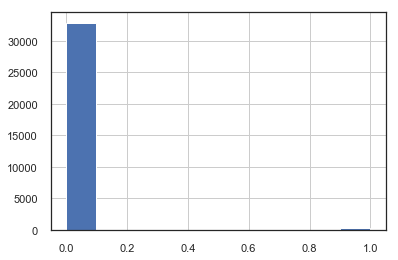

Resultado DummyClassifier 0.9900003011957471
Resultado LogisticRegression 0.9952411071955664
Resultado RidgeClassifier 0.9900003011957471
Resultado DecisionTreeClassifier 1.0
Resultado RandomForestClassifier 0.9993674889310563
Resultado SVC 0.9951507484714316


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.990,0.005
LogisticRegression,0.995,0.040
RidgeClassifier,0.990,0.010
DecisionTreeClassifier,1.000,0.039
RandomForestClassifier,0.999,0.113
SVC,0.995,0.334


In [59]:
# solução top 1%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.99)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2330.475
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.7499774103189663


<ipython-input-52-1f30bfdcd909>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = top_p(interesse["nota_total"], p=p)


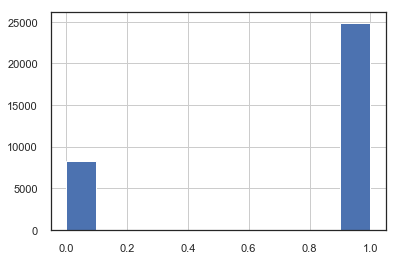

Resultado DummyClassifier 0.7500075298936779
Resultado LogisticRegression 0.9234661606578115
Resultado RidgeClassifier 0.9071714707388332
Resultado DecisionTreeClassifier 0.999849402126442
Resultado RandomForestClassifier 0.9931026173910424
Resultado SVC 0.9268696726002229


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.006
LogisticRegression,0.923,0.026
RidgeClassifier,0.907,0.010
DecisionTreeClassifier,1.000,0.058
RandomForestClassifier,0.993,0.181
SVC,0.927,4.980


In [60]:
# solução bottom 25%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.25)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta paa os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


<ipython-input-52-1f30bfdcd909>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = top_p(interesse["nota_total"], p=p)


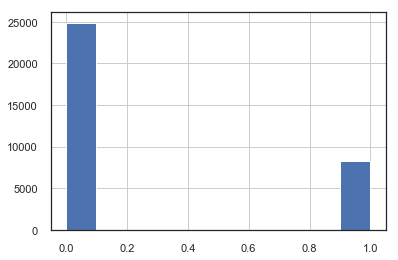

Resultado DummyClassifier 0.7500075298936779
Resultado LogisticRegression 0.9347610011746634
Resultado RidgeClassifier 0.9209963555314599
Resultado DecisionTreeClassifier 1.0
Resultado RandomForestClassifier 0.9933435739887353
Resultado SVC 0.9353935122436071


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.004
LogisticRegression,0.935,0.031
RidgeClassifier,0.921,0.010
DecisionTreeClassifier,1.000,0.056
RandomForestClassifier,0.993,0.200
SVC,0.935,4.237


In [61]:
# código pronto: rodando para top 25%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.75)
# rode a analisa_classificacao e armazene test_x, test_y e notas de 25%
notas[["accuracy_score", "tempo_de_treino"]]

## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [62]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


Acurácia do modelo em teste 0.9381042739676516


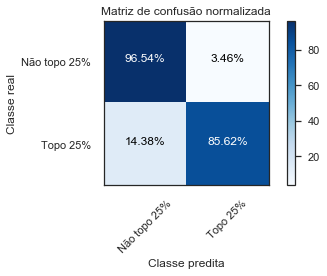

In [63]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.9384657088641908


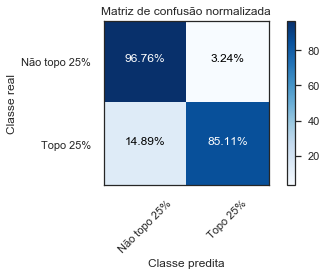

In [64]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['SVC']['pipe'])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [65]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 4382487 elementos


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [66]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados[['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3']]
    y = top_p(dados["nota_total"])
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [67]:
# solução

from sklearn.model_selection import cross_val_score

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    X, y = separa_dados_de_classificacao_para_validacao(dados)
    scores = cross_val_score(modelo, X, y)
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

quantile encontrado 2839.5
Média da validação 0.24992658278278979
Acurácia entre [93.49,93.49]
Acurácia do modelo em teste 0.9350234239143208


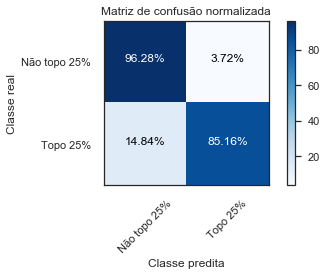

In [68]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se soment sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [69]:
# solução: implemente o código que falta

from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")
            
        parcial = X.sum(axis=1) 
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = X.sum(axis=1)
        y_pred =  np.where(parcial >= self.top_25_quantile, 1, 0) # 1 se for maior ou igual, 0 caso contrário
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

In [70]:
X, y = separa_dados_de_classificacao_para_validacao(enem_validacao)
h = HeuristicaTop25()
h.fit(X, y)
h.predict(X, y)

quantile encontrado 2839.5
Média da validação 0.24992658278278979
top 25 quantile é 1247.90


array([0, 1, 1, ..., 0, 0, 1])

quantile encontrado 2839.5
Média da validação 0.24992658278278979
top 25 quantile é 1239.80
top 25 quantile é 1246.50
top 25 quantile é 1243.80
top 25 quantile é 1253.00
top 25 quantile é 1256.20
Acurácia entre [91.87,91.91]
top 25 quantile é 1247.90
Acurácia do modelo em teste 0.918451555018874


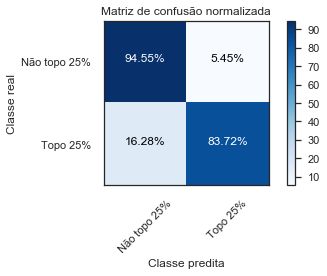

In [71]:

treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())


## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

### Solução

responderei a pergunta em 2 topicos

    1) A maior diferenca de acuracia é entre o dummy classifier e as outras duas formas de classifiçacão, pois o dummy classifier chegou a 75 e os outros estao acima de noventa
    
    2) agora comparando a heuristica e o modelo, a diferenca de acuracia dos dois é minima, mas o LogisticRegression teve mais ou menos 1,7 porcento de ganho 

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

    uma segunda heuristica pode ser, verificar se o aluno esta no top 25% em duas das tres, se estiver nos 25% em pelo menos duas materias sera incluido nos top 25% porcento 

## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução

    no primeiro caso, a faculdade pode perder um aluno com otencial, ja na segunda pode acabar dando bolsa a quem nao deveria ganhar, gerando um conflito, pois alunos que se desenvolveriam bem perderam a chance da bolsa por causa do modelo

## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!

In [72]:
print("gostei muito de fazer a prova !!")
s = ' Machine Learning'
for letra in s:
    print(letra)

gostei muito de fazer a prova !!
 
M
a
c
h
i
n
e
 
L
e
a
r
n
i
n
g
